# *Challenge - Cleaning Data*

**The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new [Marvel Cinematic Universe](https://en.wikipedia.org/wiki/Marvel_Cinematic_Universe)**

**Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the [Marvel Wikia site](http://marvel.wikia.com/wiki/Main_Page) further. The collected data is available at their [Github Repository](https://github.com/fivethirtyeight/data/tree/master/avengers).**

**Here, we will clean up the data set, so it can be more useful for analysis in pandas.**

### Importing & Cleaning Up Data

In [1]:
import pandas as pd

avengers = pd.read_csv("avengers.csv", encoding='Windows-1251')
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


### Filtering Out Bad Data

1. We only want to keep the Avengers who were introduced after 1960.
    - Store only the rows describing Avengers added in 1960 or later in true_avengers.

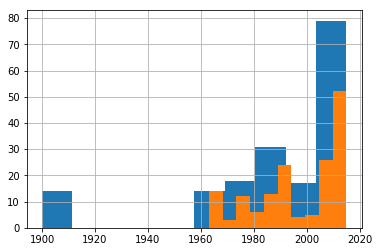

In [10]:
import matplotlib.pyplot as plt
true_avengers = avengers[avengers['Year']>=1960]

avengers['Year'].hist()
true_avengers['Year'].hist()
plt.show()

### Consolidating Deaths

1. Create a new column, Deaths, that contains the number of times each superhero died. The possible values for each death field are YES, NO, and NaN for missing data.
    - Keep all of the original columns (including Death1 to Death5) and update true_avengers with the new Deaths column.

In [17]:
cols = ['Death' + str(i) for i in range(1,6)]
true_avengers['Deaths'] = (true_avengers[cols] == 'YES').sum(axis=1)
true_avengers

/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2
5,http://marvel.wikia.com/Richard_Jones_(Earth-616),Richard Milhouse Jones,612,YES,MALE,NaN,Sep-63,1963,52,Honorary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,http://marvel.wikia.com/Steven_Rogers_(Earth-616),Steven Rogers,3458,YES,MALE,NaN,Mar-64,1964,51,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies at the end of Civil War. Later comes back.,1
7,http://marvel.wikia.com/Clint_Barton_(Earth-616),Clinton Francis Barton,1456,YES,MALE,NaN,May-65,1965,50,Full,...,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,Dies in exploding Kree ship in Averngers Vol. ...,2
8,http://marvel.wikia.com/Pietro_Maximoff_(Earth...,Pietro Maximoff,769,YES,MALE,NaN,May-65,1965,50,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in House of M Vol 1 Issue 7. Later comes ...,1
9,http://marvel.wikia.com/Wanda_Maximoff_(Earth-...,Wanda Maximoff,1214,YES,FEMALE,NaN,May-65,1965,50,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Uncanny_Avengers_Vol_1_14. Later comes...,1


### Verifying Years Since Joining

1. Calculate the number of rows where Years since joining is accurate.
    - Because this challenge was created in 2015, use that as the reference year.
    - We want to know for how many rows Years since joining was correctly calculated as the Year value subtracted from 2015.
    - Assign the integer value describing the number of rows with a correct value for Years since joining to joined_accuracy_count.

In [23]:
def get_accuracy(row):
    accurate_age = 2015 - row['Year']
    if (row['Years since joining'] == accurate_age):
        return 1
    else:
        return 0

true_avengers['k'] = true_avengers.apply(get_accuracy, axis=1)
joined_accuracy_count = true_avengers['k'].sum(axis=0)
joined_accuracy_count

/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


159